# **Decoding Airbnb Pricing in Boston: How hosts, properties, and locations shape costs.**

#### *In what ways do host attributes, property type and location contribute to the pricing structure of Airbnb listings in Boston?*

# **Introduction**

### Brief

With rising living standards, travel has become more accessible, and platforms like Airbnb play a key role in short-term rentals. As we know, Boston is known for its vibrant tourism and high cost of living.
Hence, understanding housing prices on Airbnb is crucial for both landlords and travellers. Also, pricing structure is influenced by multiple factors ranging from host attributes to the location. In this research, I am going
to study how host attributes, property characteristics, and location contribute to the pricing structure of Airbnb rentals
in Boston.

In this research, I will explore factors shaping Airbnb prices in Boston, using Airbnb Listings data (scraped on September 7, 2016) as the primary dataset. Additionally, 2015-2019 Neighborhood Tables from **"Analyze Boston"** provide socioeconomic indicators like poverty rates, population density, and median income to assess location-based pricing influences. By integrating these datasets, this research aims to provide data-driven insights into Airbnb pricing dynamics, and it will help both hosts to optimize pricing strategies and travelers to make informed decisions.

# **Variables:**

#### Outcome Variable


The outcome variable is price which specifically represents the **listing price per night** for an Airbnb property in Boston. This is the outcome variable in my research.

#### Independent Variable

1. **host_listings_count**:
   This indicates whether a host manages multiple properties. Higher values may suggest professional hosts who might price listings differently than individual hosts.

2. **host_since**: It represents the experience of the host. More experienced hosts might have better reputations, leading to higher demand and prices.

3. **host_is_superhost**: A categorical variable (which only takes value True and False). Superhosts often have better reviews and reliability, allowing them to charge premium prices.

4. **property_type**: It represents different types (e.g., apartments, houses, condos) of property which have varying levels of demand and pricing structures.

5. **bedrooms**: It is one of the amentities. More bedrooms generally lead to higher prices, as larger accommodations cater to more guests.

6. **bathrooms**: It is one of the amentities. Similar to bedrooms, more bathrooms typically increase the rental price, as they improve guest convenience.

7. **Region**: It represents all districts in Boston. Also, different neighborhoods have distinct demand levels based on proximity to key attractions, safety, and public transport access. 

8. **Per Capita Income**: It shows the average income level for each person in every district of Boston. Listings in wealthier neighborhoods may be priced higher due to the higher cost of living and increased demand from wealthier tourists.

9. **Median Household Income**: It represents the middle income level among all districts in Boston. A proxy for neighborhood affluence, which might correlate with the cost of rentals in that area.

10. **Poverty Rate**: Literally, it is just the poverty rate over all regions in Boston. Also, higher poverty rates may suggest lower demand and therefore lower prices, while lower poverty rates may indicate areas with higher Airbnb pricing.

# **Importing Tools**

In [388]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading Files**

### Reading listings.csv

In [392]:
listings = pd.read_csv('listings.csv')

### Reading supplementary file

In [395]:
file_path = "2015-2019_neighborhood_tables_2021.12.21.xlsm"
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)
df = pd.read_excel(xls, sheet_name='Race') # Sheet name can be any name in the file, I randomly put one sheet here to make code run.
print(df.head())

['Age', 'Household Type', 'Race', 'Group Quarters Population', 'Nativity', 'Geographic Mobility', 'Educational Attainment', 'School Enrollment', 'Means of Commuting', 'Travel Time to Work', 'Place of Work', 'Per Capita Income', 'Occupation', 'Industries', 'Labor Force', 'Household Income', 'Family Income', 'Housing Tenure', 'Bedrooms', 'Vacancy Rates', 'Vehicles per Household', 'Poverty Rates', 'Poverty Rates by Age']
  Race & Ethnicity        Unnamed: 1   Unnamed: 2 Unnamed: 3  \
0              NaN               NaN        45858        NaN   
1              NaN  Total Population  White Alone          %   
2   United States          324697795    197100373   0.607027   
3    Massachusetts           6850553      4903539   0.715787   
4           Boston            684379       304524   0.444964   

               Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7   Unnamed: 8  \
0                    3478        NaN       9275        NaN        12971   
1  Black/African-American          %   Hisp

# **Data Cleaning**

### Cleaning the listing data

Here, I cleaned the listings data by removing all dollar signs and turning them all into **float**. Also, I changed the date into the formal 
date demonstration. To make the data look good, I removed all commas in the string.

In [400]:
def clean_listings_data(df):
    numeric_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = df[col].replace(r'[\\$,]', '', regex=True).astype(float, errors='ignore')
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    df.dropna(subset=['price', 'minimum_nights'], inplace=True)
    df['amenities_count'] = df['amenities'].str.split(',').apply(len)  # Add amenities count column
    return df

In [402]:
listings_cleaned = clean_listings_data(listings)

In [404]:
listings_cleaned

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,amenities_count
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,NaN,f,moderate,f,f,1,NaN,15
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,NaN,t,moderate,f,f,1,1.30,21
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,moderate,t,f,1,0.47,18
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,f,NaN,NaN,f,moderate,f,f,1,1.00,23
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,f,NaN,NaN,f,flexible,f,f,1,2.25,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,NaN,5 min walking to Orange Line subway with 2 sto...,none,NaN,...,f,NaN,NaN,t,strict,f,f,8,0.34,18
3581,14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,2,NaN,24
3582,14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...",...,f,NaN,NaN,f,flexible,f,f,1,NaN,2
3583,14603878,https://www.airbnb.com/rooms/14603878,20160906204935,2016-09-07,Great Location; Train and Restaurants,"My place is close to Taco Loco Mexican Grill, ...",NaN,"My place is close to Taco Loco Mexican Grill, ...",none,NaN,...,f,NaN,NaN,f,strict,f,f,1,2.00,8


### Cleaning the supplementary data

#### Per Capita Income

Here, I first read the file on the page of "Per Capita Income", then I extracted other columns except Per Capita Income. Also, I removed all dollar signs in the "Per Capita Income" and turn them into float. Moreover, I removed extra spaces from "Region" names to ensure filtering works. Lastly, I removed the rows of "Masschusetts".

In [409]:
df_income = pd.read_excel(xls, sheet_name="Per Capita Income")
df_income = df_income.iloc[3:, [0, 3]]  
df_income.columns = ["Region", "Per Capita Income"]

df_income["Region"] = df_income["Region"].str.strip()

df_income["Per Capita Income"] = df_income["Per Capita Income"].astype(str).str.replace(r'[\$,]', '', regex=True)
df_income["Per Capita Income"] = pd.to_numeric(df_income["Per Capita Income"], errors="coerce")

df_income = df_income[df_income["Region"] != "Massachusetts"]

print(df_income)

                                               Region  Per Capita Income
4                                              Boston       44690.443599
5                                             Allston       34148.709828
6                                            Back Bay      110676.820559
7                                         Beacon Hill      100005.286070
8                                            Brighton       41261.375843
9                                         Charlestown       75338.893917
10                                         Dorchester       29767.207999
11                                           Downtown       80057.341855
12                                        East Boston       31472.545120
13                                             Fenway       28021.314461
14                                          Hyde Park       32744.080773
15                                      Jamaica Plain       51654.503634
16                                           Longwo

#### Median Household Income

Here, I first read the file on the page of "Household Income", then I extracted other columns except "Median Household Income". Also, I removed all dollar signs in the "Median Household Income" and turn them into float. Moreover, I removed extra spaces from "Region" names to ensure filtering works. Lastly, I removed the rows of "Masschusetts".

In [413]:
df_household_income = pd.read_excel(xls, sheet_name="Household Income")
df_household_income = df_household_income.iloc[3:, [0, 1]] 
df_household_income.columns = ["Region", "Median Household Income"]

df_household_income["Region"] = df_household_income["Region"].str.strip()

df_household_income["Median Household Income"] = df_household_income["Median Household Income"].astype(str).str.replace(r'[\$,]', '', regex=True)
df_household_income["Median Household Income"] = pd.to_numeric(df_household_income["Median Household Income"], errors="coerce")

df_household_income = df_household_income[df_household_income["Region"] != "Massachusetts"]

print(df_household_income)

                                               Region  Median Household Income
4                                              Boston                  71259.0
5                                             Allston                  58141.0
6                                            Back Bay                 111185.0
7                                         Beacon Hill                 110840.9
8                                            Brighton                  77624.8
9                                         Charlestown                 127399.6
10                                         Dorchester                  55009.1
11                                           Downtown                  88750.0
12                                        East Boston                  60510.4
13                                             Fenway                  41040.5
14                                          Hyde Park                  72953.1
15                                      Jamaica Plai

#### Poverty Rate

Here, I first read the file on the page of "Poverty Rate", then I extracted other columns except "Poverty Rate". Also, I removed all percentage signs in the column of "Poverty Rate" and turn them into float. Moreover, I removed extra spaces from "Region" names to ensure filtering works. Lastly, I removed the rows of "Masschusetts".

In [417]:
df_poverty = pd.read_excel(xls, sheet_name="Poverty Rates")
df_poverty = df_poverty.iloc[3:, [0, 3]]
df_poverty.columns = ["Region", "Poverty Rate"]

df_poverty["Region"] = df_poverty["Region"].str.strip()

df_poverty["Poverty Rate"] = pd.to_numeric(df_poverty["Poverty Rate"], errors="coerce")

df_poverty = df_poverty[df_poverty["Region"] != "Massachusetts"]

print(df_poverty)

                                               Region  Poverty Rate
4                                              Boston      0.189142
5                                             Allston      0.279264
6                                            Back Bay      0.119351
7                                         Beacon Hill      0.063726
8                                            Brighton      0.172059
9                                         Charlestown      0.144394
10                                         Dorchester      0.222179
11                                           Downtown      0.211283
12                                        East Boston      0.160466
13                                             Fenway      0.392009
14                                          Hyde Park      0.149196
15                                      Jamaica Plain      0.128023
16                                           Longwood      0.297436
17                                           Mat

# Summary Statistics

**Note**: "Count" represents total number of non-missing values in the column. "Unique" represents number of distinct values in the column.
"Top" represents the most frequently occurring value in the column. "Freq" represents the number of times the most frequent value appears.
"Mean" represents average. "Min" is minimum. "Max" is maximum. "25%", "75%", "50%" represents different quantiles. "Std" stands for standard deviation.

In [421]:
# Select relevant columns
selected_columns = [
    "price", "host_listings_count", "host_since", "host_is_superhost",
    "property_type", "bedrooms", "bathrooms", "neighbourhood_cleansed"
]

# Copy selected columns from listings dataset
listings_df = listings[selected_columns].copy()

# Convert price column to numeric and remove dollar sign
listings_df["price"] = listings_df["price"].astype(str).str.replace(r'[\$,]', '', regex=True)
listings_df["price"] = pd.to_numeric(listings_df["price"], errors="coerce")

# Convert host_since to datetime
listings_df["host_since"] = pd.to_datetime(listings_df["host_since"], errors="coerce")

# Rename neighbourhood column for merging
listings_df = listings_df.rename(columns={"neighbourhood_cleansed": "Region"})

# Merge economic data with Airbnb listings
merged_df = listings_df.merge(df_income, on="Region", how="left")
merged_df = merged_df.merge(df_household_income, on="Region", how="left")
merged_df = merged_df.merge(df_poverty, on="Region", how="left")

# Generate summary statistics without NA for numeric and categorical data
summary_numeric = merged_df.describe().dropna()
summary_categorical = merged_df.describe(include=["object", "bool"]).dropna()

# Calculate standard deviation for numeric variables
std_numeric = merged_df.std(numeric_only=True)

# Add standard deviation as a new row in the numeric summary statistics
summary_numeric.loc["std"] = std_numeric

# Save summary statistics to CSV
summary_numeric.to_csv("summary_numeric_with_std.csv", index=True)
summary_categorical.to_csv("summary_categorical.csv", index=True)

In [423]:
print("Summary Statistics (Numeric Data):")
print(summary_numeric)

Summary Statistics (Numeric Data):
             price  host_listings_count                     host_since  \
count  3585.000000          3585.000000                           3585   
mean    173.925802            58.902371  2014-03-27 07:57:35.397489664   
min      10.000000             0.000000            2008-11-11 00:00:00   
25%      85.000000             1.000000            2013-04-26 00:00:00   
50%     150.000000             2.000000            2014-08-04 00:00:00   
75%     220.000000             7.000000            2015-06-22 00:00:00   
max    4000.000000           749.000000            2016-09-06 00:00:00   
std     148.331321           171.119663                            NaN   

          bedrooms    bathrooms  Per Capita Income  Median Household Income  \
count  3575.000000  3571.000000        3476.000000              3476.000000   
mean      1.255944     1.221647       59856.772950             82156.230121   
min       0.000000     0.000000       20977.688743           

**Interpretations in terms of research question:** 
1. The std of price is very large means properties range from budget to luxury. Price differences indicate that property characteristics and neighborhood factors strongly influence Airbnb pricing.
2. The mean and std of host_listing_count suggests that some hosts manage multiple listings while most have only one.
For the host_since, it is just the indication of the starting date. Also, if experienced hosts or Superhosts charge higher prices, it suggests that guest trust and host reliability impact Airbnb pricing.
3. Property size is a strong determinant of Airbnb pricing. Apartments dominate the market, but houses and larger properties explain price variation. This comes from the distribution of "bedrooms" and "bathrooms", we can compare them through different quantiles of the distribution. 25% means small apartment, 50% means it has 1-2 bedrooms or bathrooms and 75% means it has 2+ bedrooms or bathrooms. Also, the variation of them is supper small.
4. With regard to the poverty rate and two income variables. "Per Capita Income" and "Median Household Income" has very large variation but "Poverty Rate" does not. So I conclude that if high-income areas charge more, it shows that Airbnb pricing aligns with general cost-of-living trends. Neighborhood wealth influences demand and listing pricing.

In [426]:
print("\nSummary Statistics (Categorical Data):")
print(summary_categorical)


Summary Statistics (Categorical Data):
       host_is_superhost property_type         Region
count               3585          3582           3585
unique                 2            13             25
top                    f     Apartment  Jamaica Plain
freq                3178          2612            343


**Interpretations in terms of research question:**
1. For the host_is_superhost, from the data above, especially "unique", it indicates that most listings are not superhosts which is that guest reviews and reputation may not always be the biggest pricing factor. If superhosts charge higher prices, it suggests that guests are willing to pay for the trusted hosts.
2. There are 13 different types of properties in Boston and aparment dominates the market. Regarding to my research question, I think if houses are priced significantly higher, it supports the idea that property type strongly affects Airbnb pricing.
3. For the region, "Jamaica Plain" has the most Airbnb listings, suggesting it is a popular area for Airbnb rentals. Regarding to my research question, if "Jamaica Plain" has lower prices, it might indicate high competition or lower demand. If some high-end neighborhoods charge more, it confirms that location is an important factor that affects Airbnb pricing.

# Visualizations

### Histogram

The line of code below, I created a new column of **"log_price"** to reduce the skewness of the data.

In [432]:
listings['log_price'] = np.log1p(listings['price'])

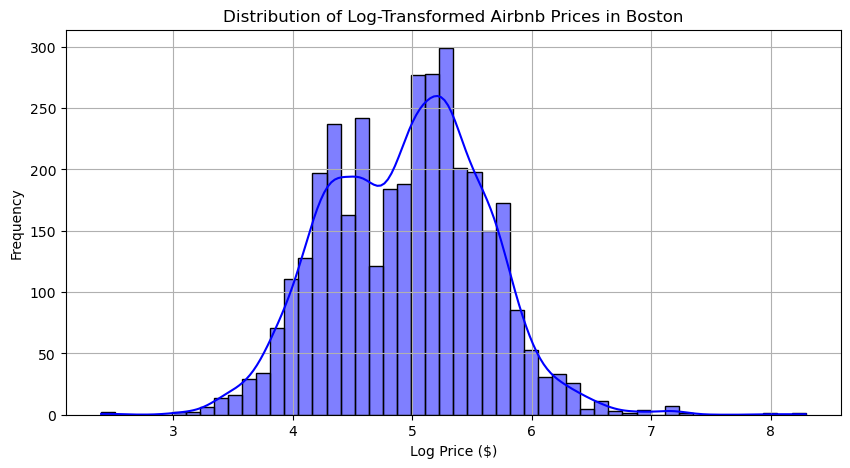

In [434]:
plt.figure(figsize=(10, 5))
sns.histplot(listings['log_price'], bins=50, kde=True, color='blue')
plt.xlabel('Log Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Log-Transformed Airbnb Prices in Boston')
plt.grid(True)
plt.show()

#### Interpretations:

Here, this diagram has the x axis to be log-transformed price which is just price in a good looking form and y axis to be the number of listings fall into each log-price range. The peak of the histogram indicates the most common price range for Airbnb listings. This suggests that most listings fall within a reasonable mid-range price, while luxury listings such as houses are less frequent. Since it has long tail, it means some high-priced listings exist, but they are much rarer. Also, it shows prices are not uniform and the distribution is not perfectly normal which means it is necessary to explore how different factors affect price levels.

### Boxplot

/var/folders/fk/yxzm2ryx4k7bb2s60whwdgwr0000gn/T/ipykernel_27180/3325581047.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='property_type', y='log_price', data=listings, palette='Set2')


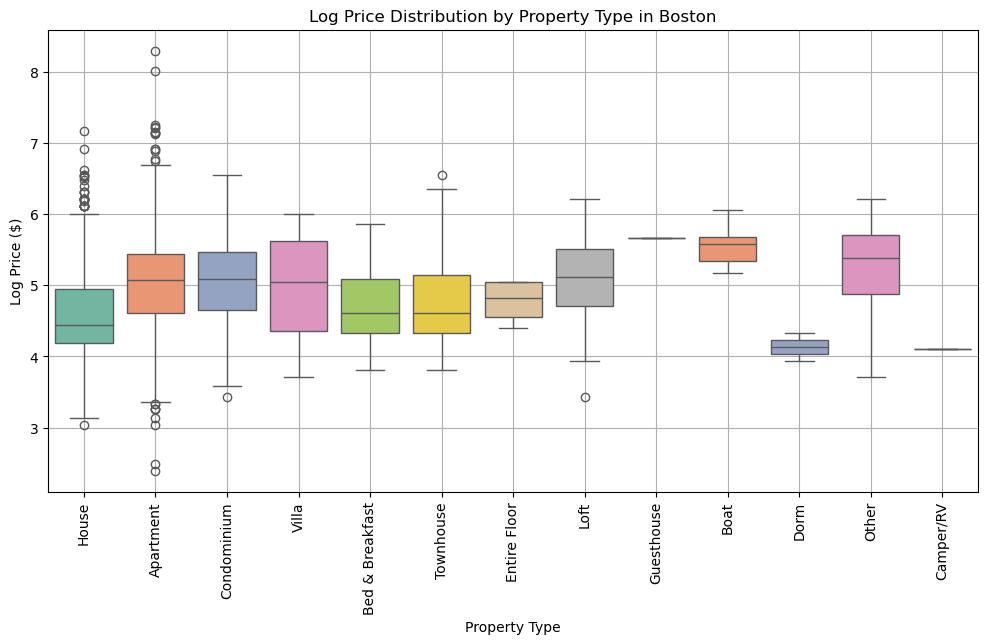

In [439]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='log_price', data=listings, palette='Set2')
plt.xticks(rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Log Price ($)')
plt.title('Log Price Distribution by Property Type in Boston')
plt.grid(True)
plt.show()

#### Interpretation:

Here, this diagram has X axis property type and Y axis log price. It shows apartments dominate the market with a lower price range which is indicated by the width of the box. Also, houses and townhouses have higher prices and more variability which they showed higher median log prices. Moreover, unique stays such as lofts and villas show high price variation which their outliers are common and it shows some luxury properties command significantly higher prices. Regarding to my research question, I think property type significantly affects pricing and price variability across property types suggests market segmentation.

### Line Plot

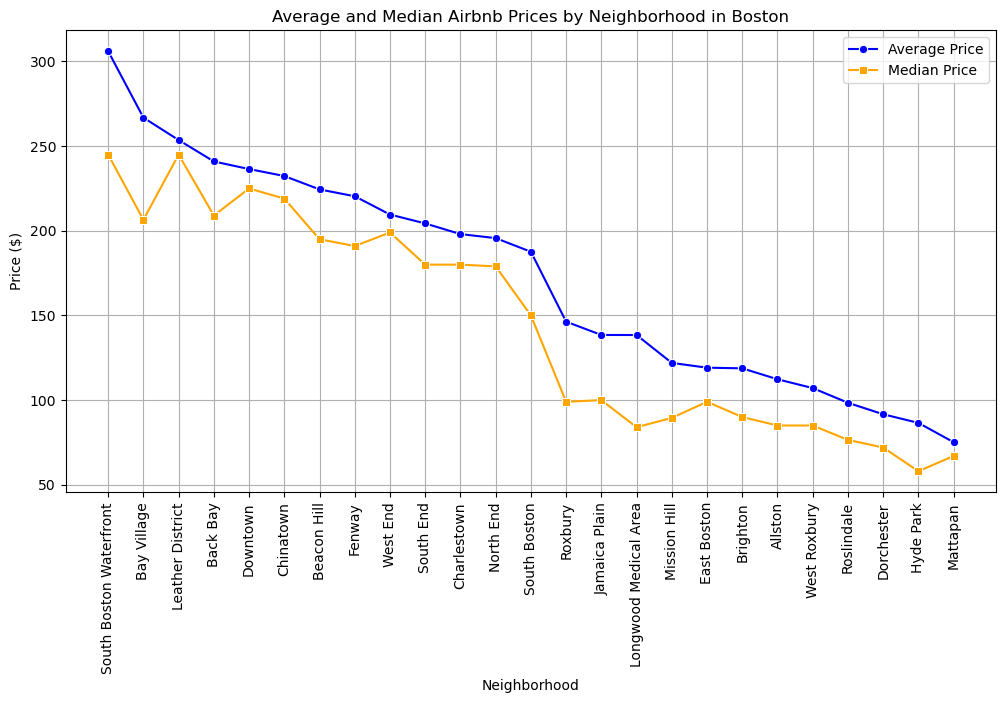

In [444]:
neighborhood_stats = listings.groupby('neighbourhood_cleansed')['price'].agg(['mean', 'median']).sort_values(by='mean', ascending=False)

plt.figure(figsize=(12, 6))
sns.lineplot(x=neighborhood_stats.index, y=neighborhood_stats['mean'], marker='o', color='blue', label='Average Price')
sns.lineplot(x=neighborhood_stats.index, y=neighborhood_stats['median'], marker='s', color='orange', label='Median Price')
plt.xticks(rotation=90)
plt.xlabel('Neighborhood')
plt.ylabel('Price ($)')
plt.title('Average and Median Airbnb Prices by Neighborhood in Boston')
plt.legend()
plt.grid(True)
plt.show()

#### Interpretations:

Here, this diagram shows the relationship between different kinds of neighborhood and price by showing uo two lines which are average price and median price. It shows a large variation in prices across neighborhoods and the average price is higher than the median price in all areas, it suggested that the presence of luxury listings or extreme outliers driving up the mean price. Regarding to my research question, this diagram confirms that location significantly impacts Airbnb pricing. Also, it highlights the effect of luxury listings on the average price because the difference between average and median prices suggests that some neighborhoods have high-end properties that push the average prices up.

### Scatter plot

##### Price vs. Number of Listings Managed by Host

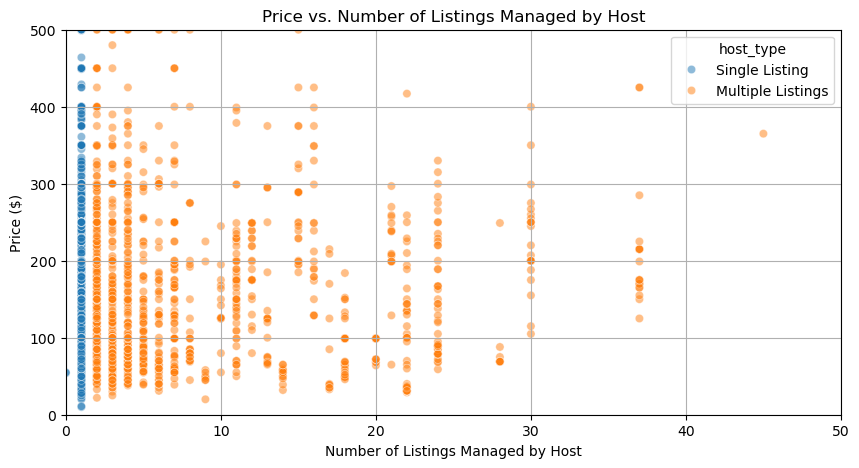

In [450]:
listings['host_listings_count'] = listings['host_listings_count'].fillna(1)
listings['host_type'] = listings['host_listings_count'].apply(lambda x: 'Multiple Listings' if x > 1 else 'Single Listing')

plt.figure(figsize=(10, 5))
sns.scatterplot(x=listings['host_listings_count'], y=listings['price'], hue=listings['host_type'], alpha=0.5)
plt.xlim(0, 50)
plt.ylim(0, 500)
plt.xlabel('Number of Listings Managed by Host')
plt.ylabel('Price ($)')
plt.title('Price vs. Number of Listings Managed by Host')
plt.grid(True)
plt.show()

#### Interpretations:

Here, this plot shows the relationship between price and number of listings managed by host. Also, it shows the majority of points are concentrated at lower host listing counts which suggests most Airbnb hosts in Boston are individual property owners rather than large-scale operators. Meanwhile, there are high-priced listings across all host types, meaning factors like location and property type matter more than host listing count. Regarding to my research question, it indicates competition among multi-listing hosts may keep prices stable and confirms that the number of listings managed by a host does not strongly impact pricing.

##### Price vs. Per Capita Income

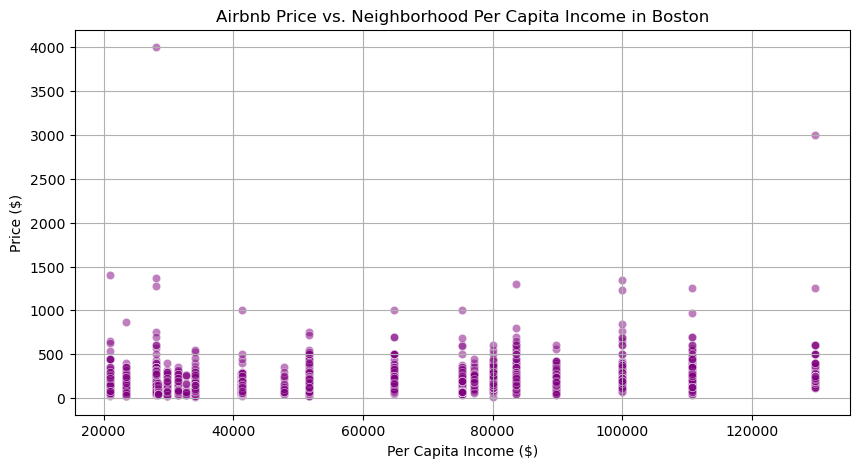

In [455]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=merged_df['Per Capita Income'], y=merged_df['price'], alpha=0.5, color='purple')
plt.xlabel('Per Capita Income ($)')
plt.ylabel('Price ($)')
plt.title('Airbnb Price vs. Neighborhood Per Capita Income in Boston')
plt.grid(True)
plt.show()

#### Interpretations:

This diagram shows the relationship between price and per capita income. It shows listings exist across all income levels, from low-income to high-income areas. This suggests that Airbnb exists in both budget-friendly and luxury neighborhoods. Also, it shows higher-income neighborhoods tend to have more high-priced listings. This indicates that wealthier areas may attract luxury Airbnb rentals. 

##### Price vs. Poverty Rate

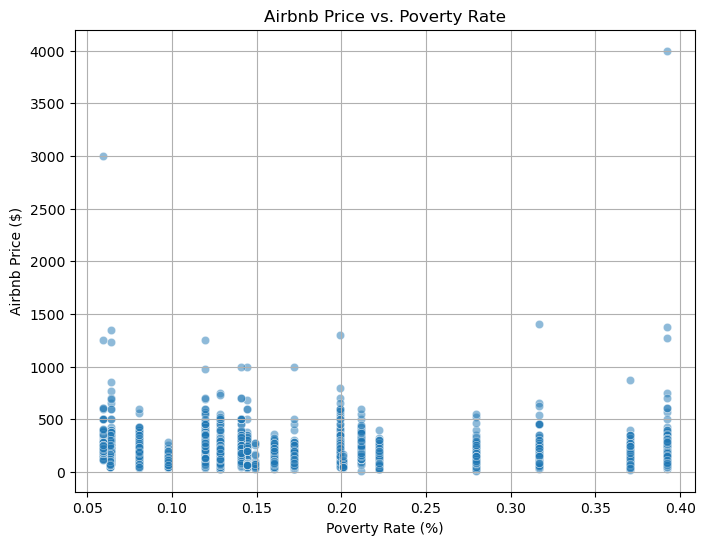

In [460]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df["Poverty Rate"], y=merged_df["price"], alpha=0.5)
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Airbnb Price ($)")
plt.title("Airbnb Price vs. Poverty Rate")
plt.grid(True)
plt.show()

#### Interpretations:

This diagram shows the relationship between price and poverty rate. It shows Airbnb listings are found across all levels of poverty, from low-poverty to high-poverty neighborhoods. Also, some low-poverty areas have both budget and luxury listings, indicating diverse property types. Meanwhile, listings in high-poverty areas are often lower-priced, likely due to lower demand and fewer luxury accommodations. Conversely, the price will be higher in low-poverty areas which suggest rich areas attract more expensive Airbnb properties.

##### Price vs. Median Household Income

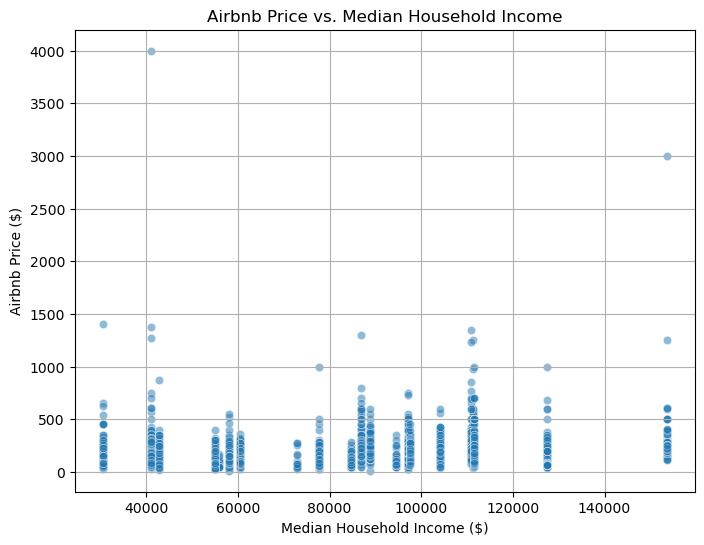

In [465]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_df["Median Household Income"], y=merged_df["price"], alpha=0.5)
plt.xlabel("Median Household Income ($)")
plt.ylabel("Airbnb Price ($)")
plt.title("Airbnb Price vs. Median Household Income")
plt.grid(True)
plt.show()

#### Interpretations:

This diagram showed the relationship between price and median household income. It actually shows something similar to the diagram "price vs. per capita income" which is higher income results higher prices. But the difference is "price vs. per capita income" focus more on personal income level, this diagram focuses on a general income level in neighborhood.

# Conclusion:

Airbnb pricing in Boston is influenced by property characteristics, host attributes, and neighborhood economic conditions. Larger properties with more bedrooms and bathrooms generally has higher price, while most listings are apartments with standardized pricing. Host factors, such as superhost status and the number of listings managed also plays a role even if their impact appears less significant than location-based economic factors. Rich neighborhoods with higher Per Capita and Median Household Income usually have more expensive listings, while areas with higher poverty rates typically see lower prices. Meanwhile, budget-friendly options also exist in rich areas which suggests that property type and rental strategy contribute to price variations.

# References:

1. Airbnb. (n.d.). Boston Airbnb Open Data. Kaggle. Retrieved from https://www.kaggle.com/datasets/airbnb/boston
2. City of Boston. (n.d.). Neighborhood Demographics. Boston.gov. Retrieved from https://data.boston.gov/dataset/neighborhood-demographics/resource/d8c23c6a-b868-4ba4-8a3b-b9615a21be07